In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
df=pd.read_csv("avocado.csv")

df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [61]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
#Descomposición de Series Temporales de Precios (por hacer)
fecha_precio=df.loc[:,["Date","AveragePrice"]]

fecha_precio["Date"]=pd.to_datetime(fecha_precio["Date"])


#seasonal_decompose(fecha_precio)

          Date               region  AveragePrice
0   2015-01-31               Albany      1.508750
1   2015-01-31              Atlanta      1.456250
2   2015-01-31  BaltimoreWashington      1.251250
3   2015-01-31                Boise      1.330000
4   2015-01-31               Boston      1.537500
..         ...                  ...           ...
751 2018-04-30             Syracuse      1.233750
752 2018-04-30                Tampa      1.289375
753 2018-04-30              TotalUS      1.283125
754 2018-04-30                 West      1.251250
755 2018-04-30     WestTexNewMexico      1.214375

[756 rows x 3 columns]


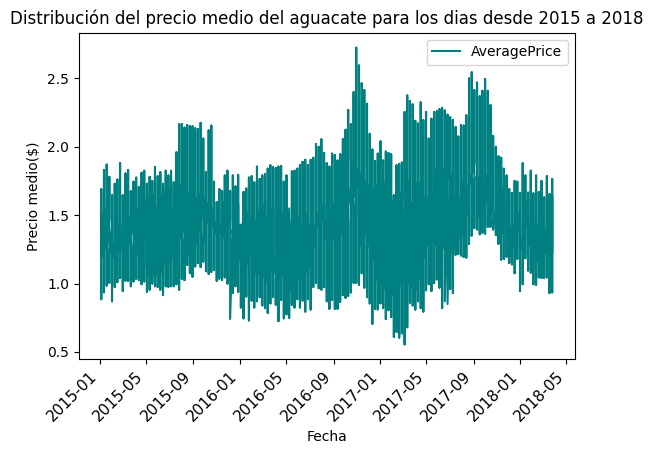

El precio máximo medio fue de Date            2018-03-25 00:00:00
region             WestTexNewMexico
AveragePrice                  2.725
dtype: object$ el día Date            9072
region            53
AveragePrice    5172
dtype: int64


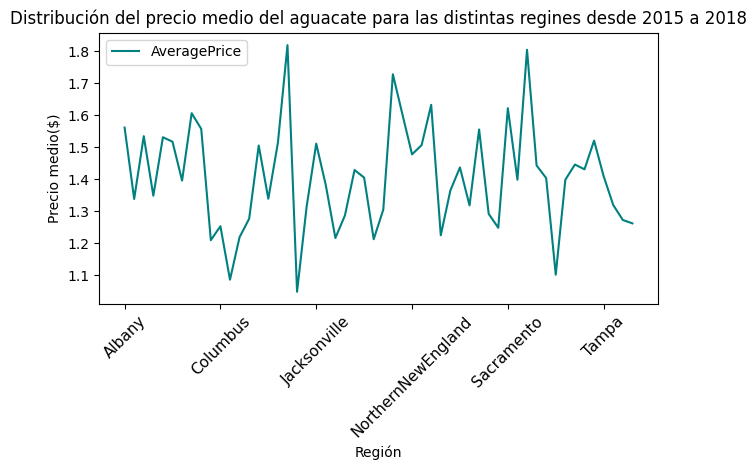

El precio máximo medio fue de region          WestTexNewMexico
AveragePrice            1.818639
dtype: object$ en region          53
AveragePrice    17
dtype: int64


In [2]:
#Análisis de Estacionalidad por Región:

"""
Aquí hay mucho código que al final no uso, pero quería dejarlo por aquí por si se nos ocurre alguna cosa. Por ejemplo, la variable avg_date_3M
agrupa los datos temporales en periodos de 3 meses usando la funcion grouper y groupby. Puedes imprimir la tabla para hacerte una idea de como queda.
También he usado el reset_index() para que si hay que graficarlo no haya ningún problema.
"""

regiondf=df.loc[:,["Date","AveragePrice","Total Volume","region"]]
regiondf["Date"]=pd.to_datetime(regiondf["Date"])

avg_region=regiondf.groupby("region")["AveragePrice"].mean().reset_index()
avg_date=regiondf.groupby("Date")["AveragePrice"].mean().reset_index()
avg_date_region=regiondf.groupby(["Date","region"])["AveragePrice"].mean().reset_index()

avg_date_3M=regiondf.groupby([pd.Grouper(key="Date", freq="3ME"),"region"])["AveragePrice"].mean().reset_index()

print(avg_date_3M)

avg_date_region.plot(x='Date', y='AveragePrice',color='teal')
plt.title('Distribución del precio medio del aguacate para los dias desde 2015 a 2018')
plt.ylabel('Precio medio($)')
plt.xlabel('Fecha')
plt.xticks(rotation=45, fontsize=11)

plt.show()

"""
Aquí es curioso que el precio max cuando se analiza individualmente cada dia fue el octubre de 2016 mientras más abajo, analizando por trimestres
el precio max se da en verano de 2017. Esto puede ser algo a comentar
"""

print(f"El precio máximo medio fue de {avg_date_region.max()}$ el día {avg_date_region.idxmax()}")

avg_region.plot(x='region', y='AveragePrice',color='teal')
plt.title('Distribución del precio medio del aguacate para las distintas regines desde 2015 a 2018')
plt.ylabel('Precio medio($)')
plt.xlabel('Región')
plt.xticks(rotation=45, fontsize=11)
plt.tight_layout()
plt.show()

print(f"El precio máximo medio fue de {avg_region.max()}$ en {avg_region.idxmax()}")


(array([540, 552, 564, 576]),
 [Text(540, 0, 'Jan\n2015'),
  Text(552, 0, 'Jan\n2016'),
  Text(564, 0, 'Jan\n2017'),
  Text(576, 0, 'Jan\n2018')])

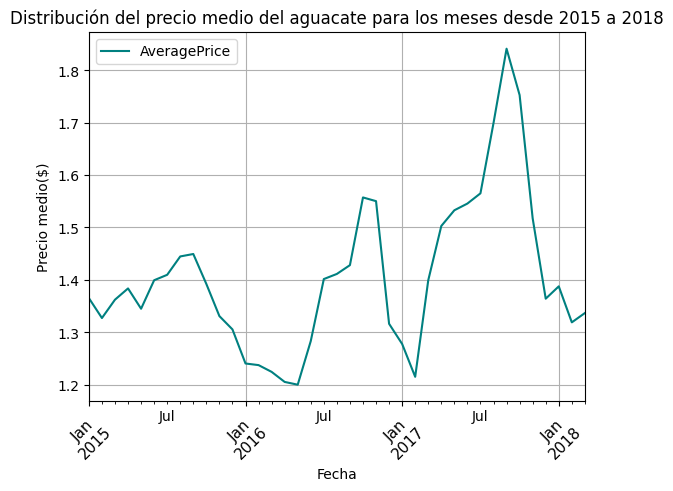

In [20]:
#Comparación de Precios Promedio Mensuales

monthdf=df.loc[:,["Date","AveragePrice"]]
monthdf["Date"]=pd.to_datetime(regiondf["Date"])

avg_date_1M=monthdf.groupby(pd.Grouper(key="Date", freq="ME"))["AveragePrice"].mean().reset_index()


avg_date_1M.plot(x='Date', y='AveragePrice',color='teal', grid=True)
plt.title('Distribución del precio medio del aguacate para los meses desde 2015 a 2018')
plt.ylabel('Precio medio($)')
plt.xlabel('Fecha')
plt.xticks(rotation=45, fontsize=11)

(array([180, 184, 188, 192]),
 [Text(180, 0, 'Q1\n2015'),
  Text(184, 0, 'Q1\n2016'),
  Text(188, 0, 'Q1\n2017'),
  Text(192, 0, 'Q1\n2018')])

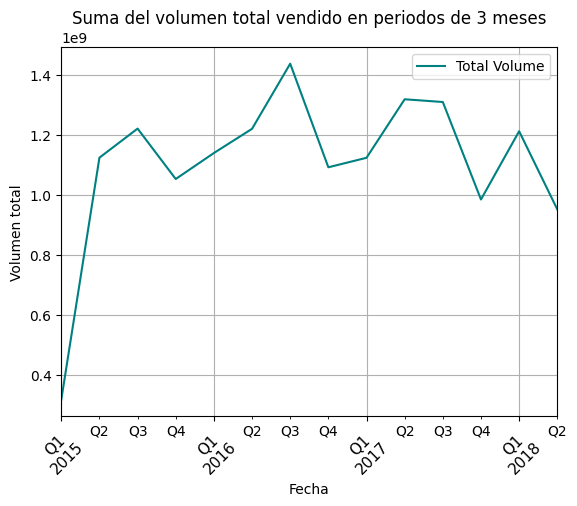

In [19]:
#Tendencia de Ventas a lo Largo del Tiempo

timedf=df.loc[:,["Date","Total Volume"]]
timedf["Date"]=pd.to_datetime(regiondf["Date"])

sum3M=timedf.groupby(pd.Grouper(key="Date", freq="3ME"))["Total Volume"].sum().reset_index()

sum3M.plot(x='Date', y='Total Volume',color='teal', grid=True)
plt.title('Suma del volumen total vendido en periodos de 3 meses')
plt.ylabel('Volumen total')
plt.xlabel('Fecha')
plt.xticks(rotation=45, fontsize=11)

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

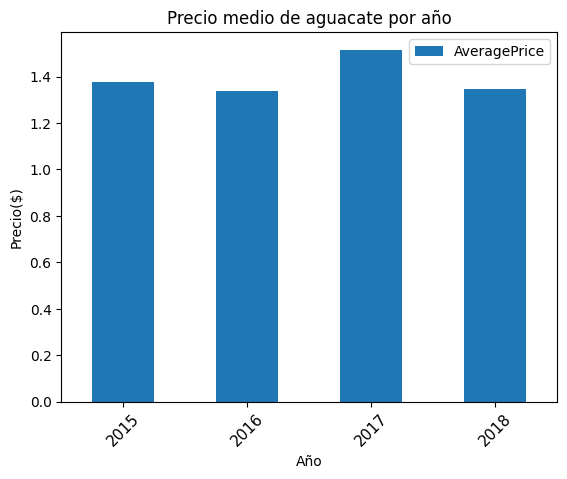

In [34]:
#Análisis de Cambios en Precios Anuales

anualdf=df.loc[:,["AveragePrice","year"]]

anual_avg=anualdf.groupby("year")["AveragePrice"].mean().reset_index()

anual_avg.plot(x="year", y="AveragePrice", kind="bar")
plt.title('Precio medio de aguacate por año')
plt.ylabel('Precio($)')
plt.xlabel('Año')
plt.xticks(rotation=45, fontsize=11)